In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:

sensordata = pd.read_csv('allsensordata.csv')
smartnode = pd.read_csv('smartnode.csv')
sd_df = pd.DataFrame(sensordata)
sn_df = pd.DataFrame(smartnode)
node_name_A = sn_df.loc[0, 'NodeName']
node_name_C = sn_df.loc[1, 'NodeName']
node_name_M = sn_df.loc[2, 'NodeName']

node_location_A = sn_df.loc[0, 'NodeLocation']
node_location_C = sn_df.loc[1, 'NodeLocation']
node_location_M = sn_df.loc[2, 'NodeLocation']

sd_df.loc[sd_df['NodeID'] == 'Aaron', ['NodeName', 'NodeLocation']] = [node_name_A, node_location_A]
sd_df.loc[sd_df['NodeID'] == 'Christine-Node-01', ['NodeName', 'NodeLocation']] = [node_name_C, node_location_C]
sd_df.loc[sd_df['NodeID'] == 'majorine', ['NodeName', 'NodeLocation']] = [node_name_M, node_location_M]

# Save the updated DataFrame to a CSV file
sd_df.to_csv('allsensordata.csv', index=False)


In [102]:
for index, row in sd_df.iterrows():
    if row['SensorType'] == 'Temperature':
        row_array = row.values.tolist()
        print(row_array)

[14699, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Temperature', 'Node1', 'outdoor']
[14703, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Temperature', 'Node1', 'outdoor']
[14707, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Temperature', 'Node1', 'outdoor']
[14711, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Temperature', 'Node1', 'outdoor']
[14715, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Temperature', 'Node1', 'outdoor']
[14719, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Temperature', 'Node1', 'outdoor']
[14723, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Temperature', 'Node1', 'outdoor']
[14727, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Temperature', 'Node1', 'outdoor']
[14731, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Temperature', 'Node1', 'outdoor']
[14735, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Temperature', 'Node1', 'outdoor']
[14739, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Temperature', 'Node1', 'outdoor']
[14743, 'C

In [103]:
row_no_temperature = []
for index, row in sd_df.iterrows():
    if row['SensorType'] == 'Temperature':
        row_array = row.values.tolist()
        row_array_no_temperature = row_array[:4] + row_array[5:]
        row_no_temperature.append(row_array_no_temperature)
        print(row_array_no_temperature)

[14699, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Node1', 'outdoor']
[14703, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Node1', 'outdoor']
[14707, 'Christine-Node-01', '12/10/2024 15:42', 26.1, 'Node1', 'outdoor']
[14711, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Node1', 'outdoor']
[14715, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Node1', 'outdoor']
[14719, 'Christine-Node-01', '12/10/2024 15:42', 26.2, 'Node1', 'outdoor']
[14723, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14727, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14731, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14735, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14739, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14743, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14747, 'Christine-Node-01', '12/10/2024 15:43', 26.2, 'Node1', 'outdoor']
[14751, 'Christine-Node-0

In [104]:
columns = ['DataID', 'NodeID', 'Timestamp', 'Temperature', 'NodeName', 'NodeLocation']
df = pd.DataFrame(row_no_temperature, columns=columns)
print(df.head())

   DataID             NodeID         Timestamp  Temperature NodeName  \
0   14699  Christine-Node-01  12/10/2024 15:42         26.1    Node1   
1   14703  Christine-Node-01  12/10/2024 15:42         26.1    Node1   
2   14707  Christine-Node-01  12/10/2024 15:42         26.1    Node1   
3   14711  Christine-Node-01  12/10/2024 15:42         26.2    Node1   
4   14715  Christine-Node-01  12/10/2024 15:42         26.2    Node1   

  NodeLocation  
0      outdoor  
1      outdoor  
2      outdoor  
3      outdoor  
4      outdoor  


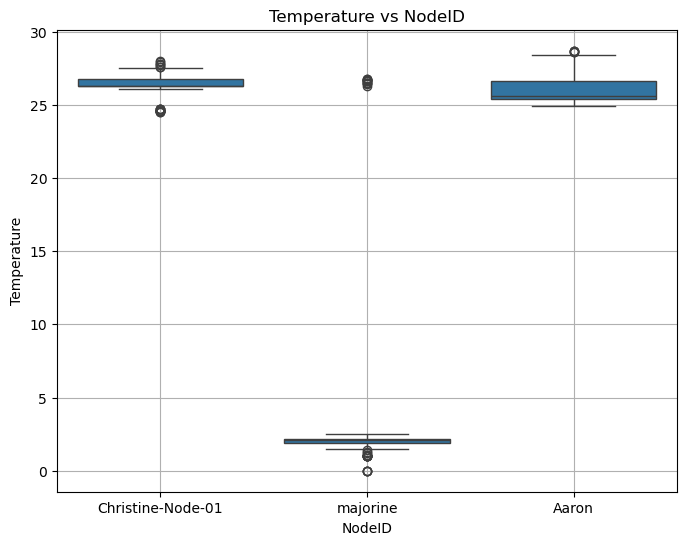

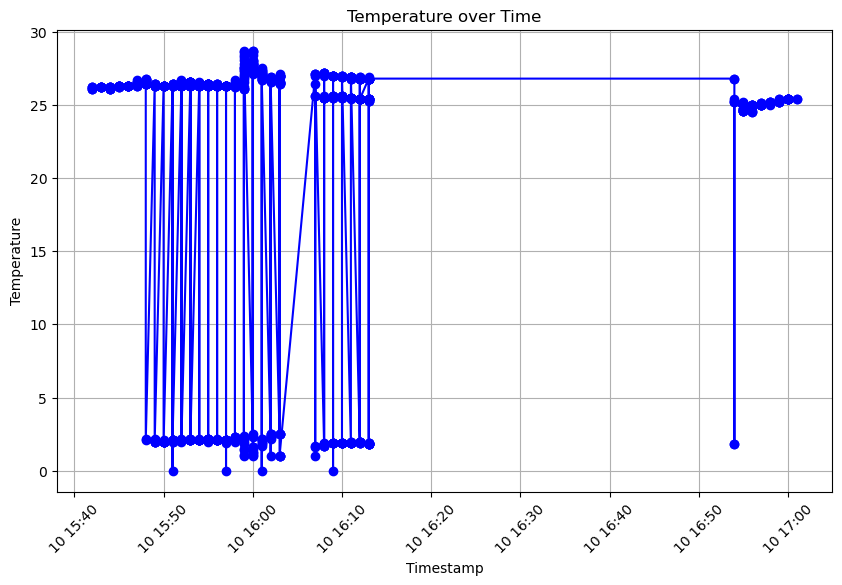

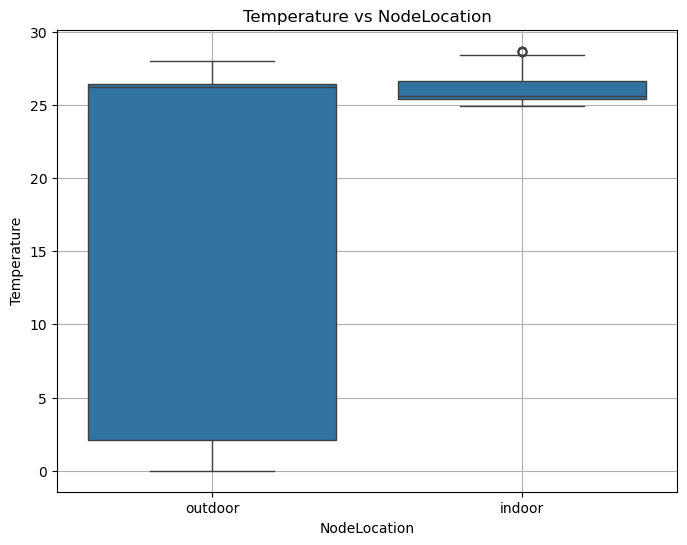

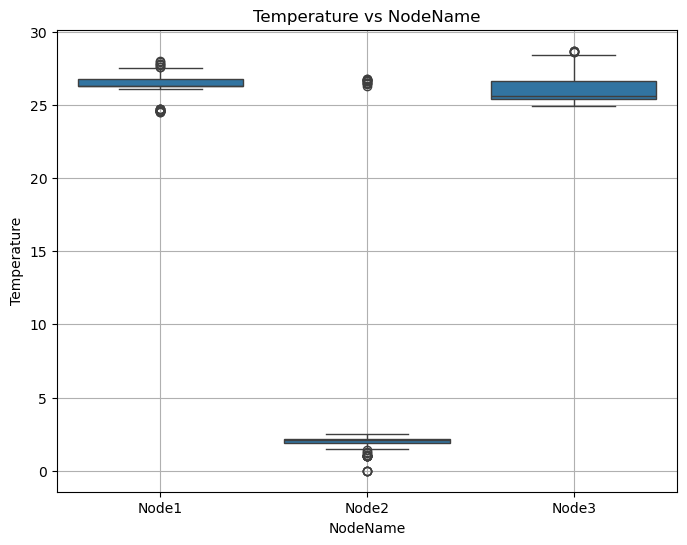

In [105]:
# Convert Timestamp to datetime type for plotting
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Temperature vs NodeID (since NodeID is categorical, use boxplot or scatterplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='NodeID', y='Temperature', data=df)
plt.title('Temperature vs NodeID')
plt.xlabel('NodeID')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Plot Temperature over Time (Timestamp)
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Temperature'], marker='o', linestyle='-', color='b')
plt.title('Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Temperature vs NodeLocation (categorical variable)
plt.figure(figsize=(8, 6))
sns.boxplot(x='NodeLocation', y='Temperature', data=df)
plt.title('Temperature vs NodeLocation')
plt.xlabel('NodeLocation')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

# Plot Temperature vs NodeName (since NodeName is categorical, use boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='NodeName', y='Temperature', data=df)
plt.title('Temperature vs NodeName')
plt.xlabel('NodeName')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [106]:
# Using label encoding to make categorical data numeric
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
for col in columns:
    if df[col].dtype=='category' or df[col].dtype=='object':
        df[col]= label_encoder.fit_transform(df[col])

print(df)

     DataID  NodeID           Timestamp  Temperature  NodeName  NodeLocation
0     14699       1 2024-12-10 15:42:00         26.1         0             1
1     14703       1 2024-12-10 15:42:00         26.1         0             1
2     14707       1 2024-12-10 15:42:00         26.1         0             1
3     14711       1 2024-12-10 15:42:00         26.2         0             1
4     14715       1 2024-12-10 15:42:00         26.2         0             1
..      ...     ...                 ...          ...       ...           ...
735   17631       0 2024-12-10 17:00:00         25.4         2             0
736   17635       0 2024-12-10 17:00:00         25.4         2             0
737   17639       0 2024-12-10 17:00:00         25.4         2             0
738   17643       0 2024-12-10 17:01:00         25.4         2             0
739   17647       0 2024-12-10 17:01:00         25.4         2             0

[740 rows x 6 columns]


In [107]:
print(df)

     DataID  NodeID           Timestamp  Temperature  NodeName  NodeLocation
0     14699       1 2024-12-10 15:42:00         26.1         0             1
1     14703       1 2024-12-10 15:42:00         26.1         0             1
2     14707       1 2024-12-10 15:42:00         26.1         0             1
3     14711       1 2024-12-10 15:42:00         26.2         0             1
4     14715       1 2024-12-10 15:42:00         26.2         0             1
..      ...     ...                 ...          ...       ...           ...
735   17631       0 2024-12-10 17:00:00         25.4         2             0
736   17635       0 2024-12-10 17:00:00         25.4         2             0
737   17639       0 2024-12-10 17:00:00         25.4         2             0
738   17643       0 2024-12-10 17:01:00         25.4         2             0
739   17647       0 2024-12-10 17:01:00         25.4         2             0

[740 rows x 6 columns]


In [108]:
# Splitting data to separate target variable from features
def get_features(target_variable):
    b = df[target_variable]
    a = df.drop(columns=[target_variable])
    return a, b
    
X,y = get_features('Temperature')

In [109]:
print(X)
print(y)

     DataID  NodeID           Timestamp  NodeName  NodeLocation
0     14699       1 2024-12-10 15:42:00         0             1
1     14703       1 2024-12-10 15:42:00         0             1
2     14707       1 2024-12-10 15:42:00         0             1
3     14711       1 2024-12-10 15:42:00         0             1
4     14715       1 2024-12-10 15:42:00         0             1
..      ...     ...                 ...       ...           ...
735   17631       0 2024-12-10 17:00:00         2             0
736   17635       0 2024-12-10 17:00:00         2             0
737   17639       0 2024-12-10 17:00:00         2             0
738   17643       0 2024-12-10 17:01:00         2             0
739   17647       0 2024-12-10 17:01:00         2             0

[740 rows x 5 columns]
0      26.1
1      26.1
2      26.1
3      26.2
4      26.2
       ... 
735    25.4
736    25.4
737    25.4
738    25.4
739    25.4
Name: Temperature, Length: 740, dtype: float64


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Testing using user inputs
input_test = pd.DataFrame(columns=columns)
input_test_x = input_test.drop(columns='Temperature')
input_test_x.loc[0] = input("Please enter the DataID: ")
input_test_x.loc[1] = input("Please enter the NodeID: ")
input_test_x.loc[2] = input("Please enter the Timestamp: ")
input_test_x.loc[3] = input("Please enter the Node Name: ")
input_test_x.loc[4] = input("Please enter the Node Location: ")

input_label_encoder = preprocessing.LabelEncoder()
input_test_x.loc[1] = input_label_encoder.fit_transform(input_test_x.loc[1])
input_test_x.loc[3] = input_label_encoder.fit_transform(input_test_x.loc[3])
input_test_x.loc[4] = input_label_encoder.fit_transform(input_test_x.loc[4])

lr_input_pred = lr_model.predict(input_test_x)
rfr_input_pred = rfr_model.predict(input_test_x)

print(f"Predicted Temperature with Linear Regression: {lr_input_pred[0]}")
print(f"Predicted Temperature with Random Forest Regression: {rfr_input_pred[0]}")

In [ ]:
print(df.loc[100])

In [ ]:
pip install xgboost

In [115]:

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

# Load and preprocess data
sensor_data = pd.read_csv('allsensordata.csv')
sensor_data['Timestamp'] = pd.to_datetime(sensor_data['Timestamp'])
temperature_data = sensor_data[sensor_data['SensorType'] == 'Temperature'].copy()

# Feature engineering: Add DayOfWeek and Hour
temperature_data['DayOfWeek'] = temperature_data['Timestamp'].dt.dayofweek
temperature_data['Hour'] = temperature_data['Timestamp'].dt.hour

# Drop irrelevant columns
temperature_data = temperature_data.drop(columns=['DataID', 'Timestamp', 'SensorType'])

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['NodeID', 'NodeName', 'NodeLocation']
for col in categorical_columns:
    temperature_data[col] = label_encoder.fit_transform(temperature_data[col])

# Split data into features and target
X = temperature_data.drop(columns=['SensorValue'])
y = temperature_data['SensorValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae
    print(f"{name}: Mean Absolute Error = {mae:.2f}")


Linear Regression: Mean Absolute Error = 1.46
Random Forest: Mean Absolute Error = 1.31
XGBoost: Mean Absolute Error = 1.32


In [116]:
temperature_prediction = models["XGBoost"].predict([X_test.iloc[100].values])
print(f"Predicted Temperature for 100th element: {temperature_prediction[0]:.2f}")

Predicted Temperature for 100th element: 25.77


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Identify numeric and non-numeric columns
numeric_columns = water_usage_data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = water_usage_data.select_dtypes(exclude=['float64', 'int64']).columns

# Step 2: Drop non-numeric columns (or apply encoding if needed)
data_for_clustering = water_usage_data.drop(columns=non_numeric_columns)

# Step 3: Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Step 4: Handle NaN values by replacing them with the column means
means = np.nanmean(data_scaled, axis=0)
data_scaled[np.isnan(data_scaled)] = np.take(means, np.where(np.isnan(data_scaled))[1])

# Step 5: Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Step 6: Perform K-Means clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 7: Add cluster labels to the dataset
water_usage_data['Cluster'] = clusters

# Step 8: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
water_usage_data['PCA1'] = pca_result[:, 0]
water_usage_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=water_usage_data,
    palette='viridis', s=100
)
plt.title('Clusters Visualized with PCA')
plt.show()

# Step 9: Cluster profiling by analyzing the mean of each numeric feature in each cluster
# Re-attach the 'Cluster' column to the numeric data
numeric_data_with_cluster = water_usage_data[numeric_columns].copy()
numeric_data_with_cluster['Cluster'] = water_usage_data['Cluster']

# Calculate the mean of numeric features in each cluster
cluster_means = numeric_data_with_cluster.groupby('Cluster').mean()
print(cluster_means)
